In [110]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn import set_config
from sklearn.model_selection import cross_val_score
set_config(transform_output='pandas')
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Data analysis

In [2]:
# load train & test data
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

## Raw training data

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
# calculate the number of unique values
train_data['Ticket'].nunique()

681

/home/carlos/projects/ai/mlearning/titanic/titanic-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/carlos/projects/ai/mlearning/titanic/titanic-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/carlos/projects/ai/mlearning/titanic/titanic-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/carlos/projects/ai/mlearning/titanic/titanic-env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the 

<Axes: xlabel='Age', ylabel='Survived'>

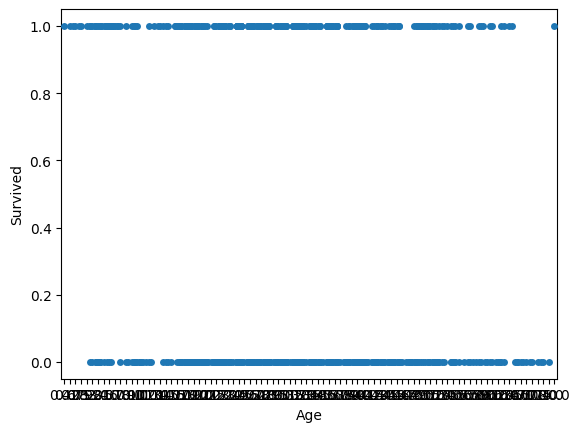

In [69]:
#sns.scatterplot(x=train_data['Fare'], y=train_data['Survived'])
sns.swarmplot(x='Age', y='Survived', data=train_data)

### Raw testing data

In [172]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Pre-Processing

In [50]:
# filter out non-important columns (aka select features)
features = ['Pclass','Sex', 'Age','SibSp','Parch','Fare', 'Cabin', 'Embarked']


def preprocess(df):
    df['Cabin'] = df['Cabin'].str[:1]
    return df.loc[:, features]


titanic_df = preprocess(train_data)

In [43]:
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C,C


In [95]:
# transform columns into numeric values


#transformer = ColumnTransformer(transformers=[
#    ('t1', SimpleImputer(strategy='mean'), ['Age']),
#    ('t2', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Z'), ['Cabin'])
#], remainder='passthrough')


transformer = ColumnTransformer(transformers=[
    ('age', SimpleImputer(strategy='mean'), ['Age']),
    ('cabin', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Z')),
        ('encoder', OrdinalEncoder())
    ]), ['Cabin']),
    ('sex', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Sex', 'Embarked'])
], remainder='passthrough')


transfomed_data = transformer.fit_transform(titanic_df)
#transfomed_data = pd.get_dummies(titanic_df)

transfomed_data

,age__Age,cabin__Cabin,sex__Sex_female,sex__Sex_male,sex__Embarked_C,sex__Embarked_Q,sex__Embarked_S,sex__Embarked_nan,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare
0,22.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,3,1,0,7.2500
1,38.000000,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,0,71.2833
2,26.000000,8.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0,0,7.9250
3,35.000000,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0,53.1000
4,35.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0,0,13.0000
887,19.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,30.0000
888,29.699118,8.0,1.0,0.0,0.0,0.0,1.0,0.0,3,1,2,23.4500
889,26.000000,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,0,30.0000


In [49]:
transfomed_data

,t1__Age,t2__Cabin,t3__Sex_female,t3__Sex_male,t3__Cabin_A,t3__Cabin_B,t3__Cabin_C,t3__Cabin_D,t3__Cabin_E,t3__Cabin_F,t3__Cabin_G,t3__Cabin_T,t3__Cabin_nan,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare,remainder__Embarked
0,22.000000,Z,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0,7.2500,S
1,38.000000,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,71.2833,C
2,26.000000,Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0,0,7.9250,S
3,35.000000,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,53.1000,S
4,35.000000,Z,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,Z,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,0,13.0000,S
887,19.000000,B,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,30.0000,S
888,29.699118,Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,2,23.4500,S
889,26.000000,C,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,30.0000,C


In [96]:
# split data into train and test using a 20% split

X = transfomed_data
y = train_data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)



# Train Models

## Decision Tree

In [176]:
# perform Decision Tree training and calculate score
dtc = DecisionTreeClassifier(max_depth=4)

dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)


0.8156424581005587

In [177]:
mean_absolute_error(y_test, dtc.predict(X_test))

0.18435754189944134

### Find best parameters

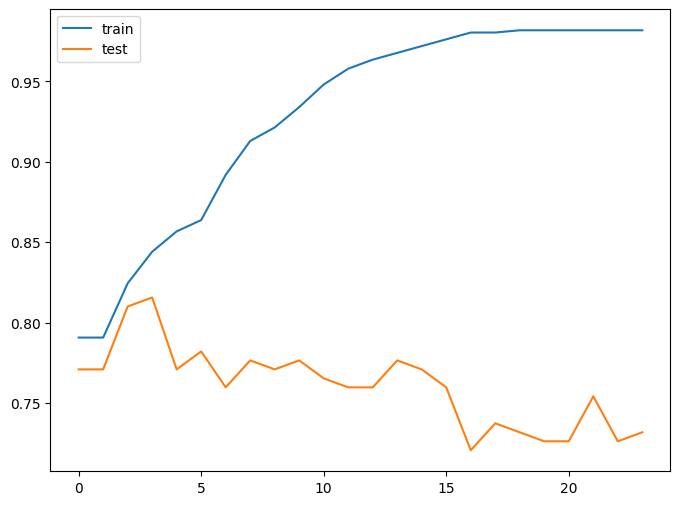

In [178]:
# loop over various values of max_depth and check the score

trainScores = []
testScores = []

for i in range(1,25):

    dt = DecisionTreeClassifier(max_depth=i)
    
    dt.fit(X_train, y_train)
    
    trainScores.append(dt.score(X_train, y_train))
    testScores.append(dt.score(X_test, y_test))

ax = pd.DataFrame({'train': trainScores, 'test': testScores}).plot.line(figsize=(8,6))

### Cross Validation

In [179]:

dt_pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(max_depth=4))
])

scores = -1 * cross_val_score(dt_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())

0.19635302240913938


## Random Forest

In [111]:
def getRandomForest():
    return RandomForestClassifier(n_estimators=200, max_depth=6, criterion="gini", random_state=0)


rf = getRandomForest()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8268156424581006

In [112]:
mean_absolute_error(y_test, rf.predict(X_test))

0.17318435754189945

### Find best parameters

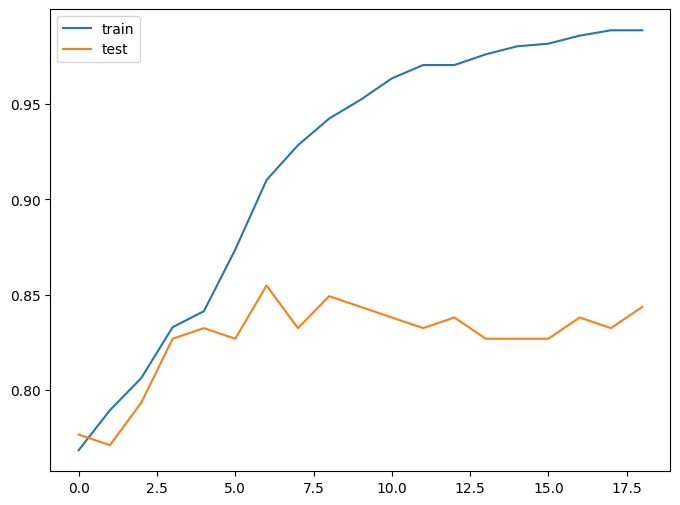

In [99]:
trainScores = []
testScores = []

for i in range(1,20):

    rf = RandomForestClassifier(n_estimators=200, max_depth=i, criterion="gini", random_state=0)
    rf.fit(X_train, y_train)
    
    trainScores.append(rf.score(X_train, y_train))
    testScores.append(rf.score(X_test, y_test))

ax = pd.DataFrame({'train': trainScores, 'test': testScores}).plot.line(figsize=(8,6))

### Cross Validation

In [113]:
dt_pipeline = Pipeline(steps=[
    ('model', getRandomForest())
])

scores = -1 * cross_val_score(dt_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())

0.1907915385098236


## XGBoost

In [108]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=110, learning_rate=0.05)

xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8324022346368715

In [109]:
mean_absolute_error(y_test, xgb.predict(X_test))

0.16759776536312848

## Final training

In [ ]:
final = getRandomForest()
#final = XGBClassifier(n_estimators=190, learning_rate=0.05)
final.fit(X, y)

#prediction

transfomed_test_data = pd.get_dummies(transformer.transform(preprocess(test_data)))

#transfomed_test_data = pd.get_dummies(test_data.loc[:, features])
transfomed_test_data

X.columns

#predictions = final.predict(transfomed_test_data)
#predictions



Index(['t1__Age', 'remainder__Pclass', 'remainder__SibSp', 'remainder__Parch',
       'remainder__Fare', 't2__Cabin_A', 't2__Cabin_B', 't2__Cabin_C',
       't2__Cabin_D', 't2__Cabin_E', 't2__Cabin_F', 't2__Cabin_G',
       't2__Cabin_T', 't2__Cabin_Z', 'remainder__Sex_female',
       'remainder__Sex_male', 'remainder__Embarked_C', 'remainder__Embarked_Q',
       'remainder__Embarked_S'],
      dtype='object')

## Prepare submission

In [70]:
transfomed_test_data.columns

Index(['t1__Age', 'remainder__Pclass', 'remainder__SibSp', 'remainder__Parch',
       'remainder__Fare', 't2__Cabin_A', 't2__Cabin_B', 't2__Cabin_C',
       't2__Cabin_D', 't2__Cabin_E', 't2__Cabin_F', 't2__Cabin_G',
       't2__Cabin_Z', 'remainder__Sex_female', 'remainder__Sex_male',
       'remainder__Embarked_C', 'remainder__Embarked_Q',
       'remainder__Embarked_S'],
      dtype='object')

In [67]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':predictions})
output

NameError: name 'predictions' is not defined

In [43]:
output.to_csv('submission.csv', index=False)